# Advanced modelling of projectile motion

This exercise investigates the two-dimensional motion of a projectile under both ideal and realistic conditions, incorporating trajectory modelling, numerical solutions, and result visualisation. Projectile motion is a fundamental topic in physics and engineering, with applications in aerospace dynamics, robotics, and ballistics. Classical models assume constant gravity and neglect air resistance, allowing for analytical solutions. This study extends the traditional approach by introducing realistic factors such as air resistance and altitude-dependent gravity, which introduce complexities requiring numerical techniques for solution. By combining theoretical modelling with computational analysis, the exercise provides insights into the effects of these factors on the projectile's trajectory.


## Problem formulation

To model the motion of a projectile, a mathematical framework is established to describe its trajectory under both ideal and realistic conditions. The ideal case assumes no air resistance and constant gravitational acceleration, allowing for analytical solutions, while more complex scenarios require numerical methods to account for external forces such as drag and variable gravity.

### Ideal conditions

In the ideal case (no air resistance and constant gravity), the equations of motion for the projectile are:

-   Horizontal position:
    $$
    x(t) = v_0 \cos(\theta)t
    $$
-   Vertical position:
    $$
    y(t) = v_0 \sin(\theta)t - \frac{1}{2}gt^2
    $$

Where:

-   $v_0$ is the initial velocity.
-   $\theta$ is the launch angle.
-   $g$ is the constant gravitational acceleration.

Key metrics such as time of flight $T$, maximum height $H$, and range $R$ can be derived analytically.

### Motion with air resistance

To include air resistance, a velocity-dependent drag force $\mathbf{F_d} = -k \mathbf{v}$ is introduced, leading to the equations:

$$
\frac{dx}{dt} = v_x, \quad \frac{dy}{dt} = v_y
$$

$$
\frac{dv_x}{dt} = -\frac{k}{m}v_x, \quad \frac{dv_y}{dt} = -g - \frac{k}{m}v_y
$$

Where:

-   $v_x$ and $v_y$ are the horizontal and vertical components of the velocity.
-   $m$ is the mass of the projectile.

### Variable gravity

Gravitational acceleration is modelled as:

$$
g(y) = g_0 \left( \frac{R}{R + y} \right)^2
$$

Where:

-   $g_0$ is the standard gravitational acceleration at the Earth's surface.
-   $R = 6371 km$ is the Earth's radius.
-   $y$ is the altitude.


## Implementation


### Parameter definition and initialisation

The parameter set defines initial velocity, launch angle, drag coefficient, and mass for different test cases.


In [ ]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
g_0 = 9.81  # Gravitational acceleration at Earth's surface (m/s^2)
R = 6371000  # Radius of Earth in meters
m = 1.0  # Mass of the projectile (kg)

# Initial velocity (same for all conditions)
v_0 = 100  # Initial velocity (m/s)

# Launch angles (degrees) for testing parameter sensitivity
angles = [30, 45, 60]

# Air resistance coefficient (small, medium, large)
k_values = [0.01, 0.05, 0.1]

# Time span for the simulation
t_span = (0, 50)  # Start time, end time (seconds)
t_eval = np.linspace(0, 50, 1000)  # Time points for evaluation


def initial_state(angle):
    """
    Function to generate the initial state based on the launch angle.

    Parameters
    ----------
    angle : float
        Launch angle in degrees.

    Returns
    -------
    list
        Initial state of the projectile [x0, y0, vx0, vy0].
    """
    angle_rad = np.radians(angle)  # Convert angle to radians
    vx0 = v_0 * np.cos(angle_rad)  # Initial velocity in x direction
    vy0 = v_0 * np.sin(angle_rad)  # Initial velocity in y direction
    return [0, 0, vx0, vy0]  # [x0, y0, vx0, vy0]

### Function to solve the system of equations

There are two conditions:

-   Ideal -> Constant gravity and no air resistance.
-   Advanced -> Variable gravity and air resistance.


In [2]:
# Ideal case with no air resistance and constant gravity
def equations_ideal(t, state):
    """
    Function to compute the derivatives of the state variables for the ideal case (no air resistance, constant gravity).

    Parameters
    ----------
    t : float
        Time (seconds)
    state : list
        List of state variables [x, y, vx, vy]

    Returns
    -------
    derivs : list
        List of derivatives [dx/dt, dy/dt, dvx/dt, dvy/dt]
    """
    x, y, vx, vy = state

    # Constant gravity
    g = g_0

    # No air resistance, so acceleration is only due to gravity
    ax = 0
    ay = -g

    return [vx, vy, ax, ay]


# Advanced case with air resistance and variable gravity
def equations_advanced(t, state, k):
    """
    Function to compute the derivatives of the state variables for the advanced case (air resistance, variable gravity).

    Parameters
    ----------
    t : float
        Time (seconds)
    state : list
        List of state variables [x, y, vx, vy]
    k : float
        Air resistance coefficient

    Returns
    -------
    derivs : list
        List of derivatives [dx/dt, dy/dt, dvx/dt, dvy/dt]
    """
    x, y, vx, vy = state

    # Variable gravity
    g = g_0 * (R / (R + y)) ** 2

    # Air resistance
    ax = -k * vx / m
    ay = -g - k * vy / m

    return [vx, vy, ax, ay]


# Function to solve the projectile motion equations
def solve_trajectories(angle, k=None):
    """
    Function to solve the projectile motion equations for the ideal and advanced cases.

    Parameters
    ----------
    angle : float
        Launch angle (degrees)
    k : float
        Air resistance coefficient (default is None)

    Returns
    -------
    sol_ideal : object
        Solution object for the ideal case
    sol_advanced : object
        Solution object for the advanced case (or None if k is None)
    """
    # Ideal trajectory
    init_cond = initial_state(angle)
    sol_ideal = solve_ivp(equations_ideal, t_span, init_cond, t_eval=t_eval)

    # Advanced trajectory with air resistance and variable gravity
    if k is not None:
        sol_advanced = solve_ivp(
            equations_advanced, t_span, init_cond, t_eval=t_eval, args=(k,)
        )
    else:
        sol_advanced = None

    return sol_ideal, sol_advanced

## Results

### Trajectory plot for ideal vs advanced conditions

-   Ideal condition (blue lines): Represents the parabolic trajectories predicted by classical mechanics under the assumptions of constant gravity and no air resistance. These trajectories are symmetrical.

-   Advanced condition (red lines): Displays the projectile's motion under realistic conditions, including air resistance and variable gravity. The reduced height and range are evident, and the trajectories are asymmetrical due to deceleration from air resistance.


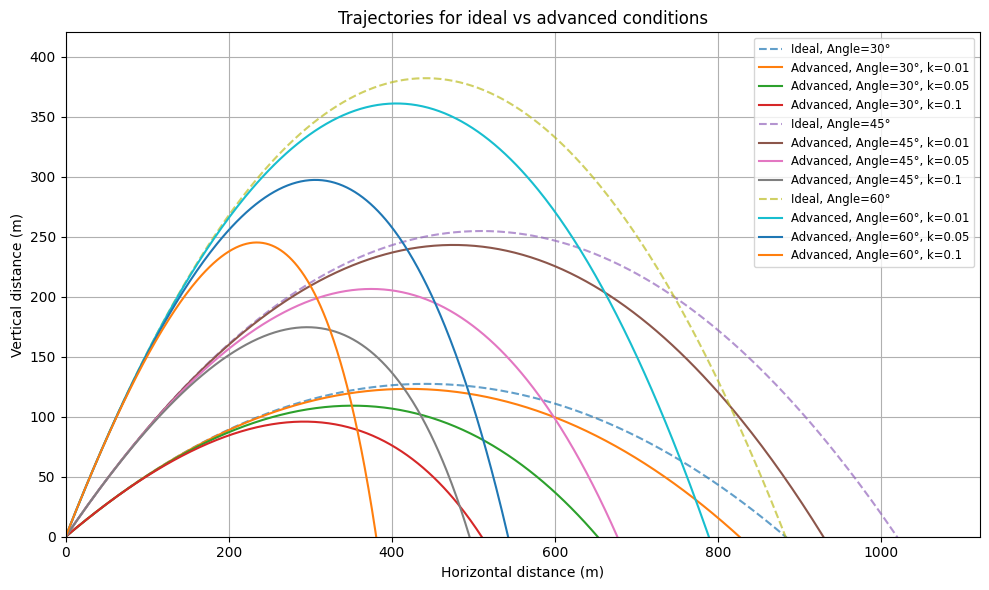

In [3]:
# Plotting the trajectories
plt.figure(figsize=(10, 6))

# Variables to store the maximum x and y values
max_x = 0
max_y = 0

# Iterate over angles and plot both ideal trajectories
for angle in angles:
    sol_ideal = solve_trajectories(angle)[0]

    # Find the maximum x where y=0 for ideal trajectory
    y_ideal = sol_ideal.y[1]
    x_ideal = sol_ideal.y[0]
    x_ground_ideal = x_ideal[y_ideal >= 0][-1] if np.any(y_ideal >= 0) else 0
    max_x = max(max_x, x_ground_ideal)
    max_y = max(max_y, np.max(y_ideal))

    # Plot ideal trajectory
    plt.plot(
        x_ideal, y_ideal, linestyle="--", label=f"Ideal, Angle={angle}°", alpha=0.7
    )

    # Iterate over air resistance coefficients and plot advanced trajectories
    for k_value in k_values:
        sol_advanced = solve_trajectories(angle, k_value)[1]

        # Find the maximum x where y=0 for advanced trajectory
        y_advanced = sol_advanced.y[1]
        x_advanced = sol_advanced.y[0]
        x_ground_advanced = (
            x_advanced[y_advanced >= 0][-1] if np.any(y_advanced >= 0) else 0
        )
        max_x = max(max_x, x_ground_advanced)
        max_y = max(max_y, np.max(y_advanced))

        # Plot advanced trajectory
        plt.plot(x_advanced, y_advanced, label=f"Advanced, Angle={angle}°, k={k_value}")

# Set the limits based on maximum x and y
plt.xlim(0, max_x * 1.1)  # Add 10% buffer for better visualization
plt.ylim(0, max_y * 1.1)  # Add 10% buffer to the max height

# Titles and labels
plt.title("Trajectories for ideal vs advanced conditions")
plt.xlabel("Horizontal distance (m)")
plt.ylabel("Vertical distance (m)")
plt.grid(True)
plt.legend(loc="upper right", fontsize="small")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

### Range vs time with variable gravity and air resistance

This plot illustrates the evolution of the projectile's horizontal range over time under both ideal and advanced conditions.


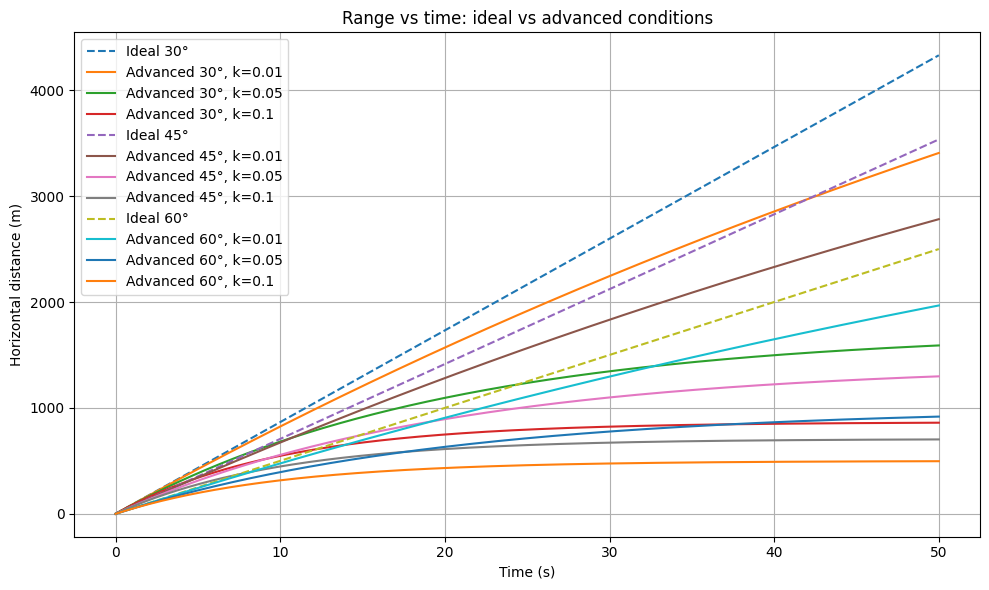

In [4]:
# Plotting the range vs time
plt.figure(figsize=(10, 6))

# Iterate over angles and plot both ideal trajectories
for angle in angles:
    sol_ideal = solve_trajectories(angle)[0]
    plt.plot(t_eval, sol_ideal.y[0], linestyle="--", label=f"Ideal {angle}°")

    # Iterate over air resistance coefficients and plot advanced trajectories
    for k_value in k_values:
        sol_advanced = solve_trajectories(angle, k_value)[1]
        plt.plot(
            t_eval,
            sol_advanced.y[0],
            linestyle="-",
            label=f"Advanced {angle}°, k={k_value}",
        )

# Titles and labels
plt.title("Range vs time: ideal vs advanced conditions")
plt.xlabel("Time (s)")
plt.ylabel("Horizontal distance (m)")
plt.legend()
plt.grid(True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

### Maximum height comparison for different launch angles

This plot demonstrates the maximum height reached by the projectile for different launch angles under both ideal and advanced conditions. It highlights how air resistance and variable gravity reduce the achievable height.


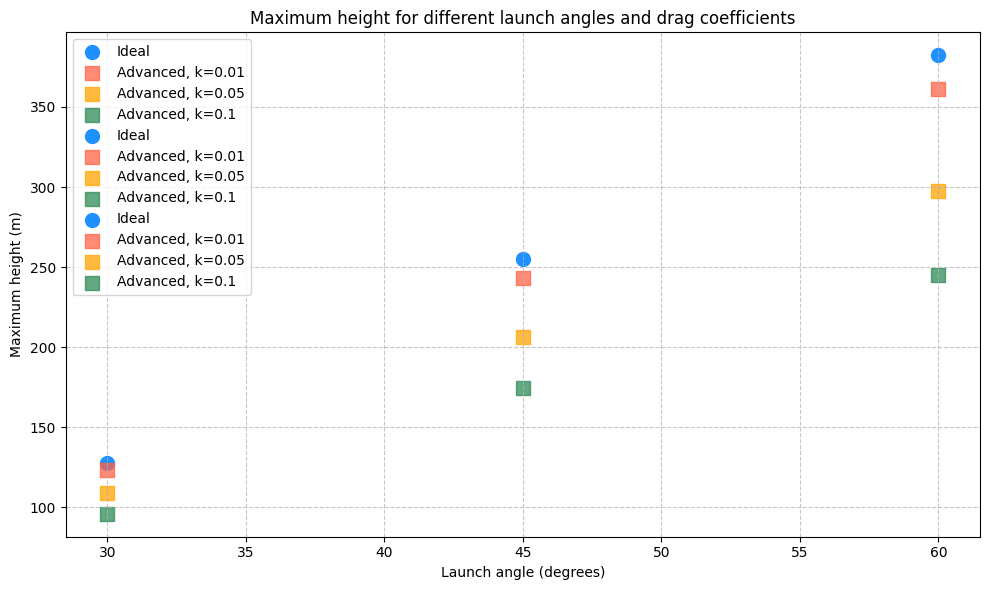

In [5]:
# Plotting the maximum height for different launch angles and drag coefficients
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width
bar_width = 0.1
x_pos = np.arange(len(angles))
bottoms = np.zeros(len(angles))  # Initial bottom of the bars (start from 0)

# Iterate over angles and drag coefficients
for angle in angles:
    # For ideal conditions (which is independent of k)
    sol_ideal = solve_trajectories(angle)[0]  # Only need to solve for ideal trajectory
    ideal_max_height = np.max(sol_ideal.y[1])
    ax.scatter(
        angle, ideal_max_height, color="dodgerblue", s=100, label="Ideal", marker="o"
    )

    # For advanced conditions (with different drag coefficients)
    colors = ["tomato", "orange", "seagreen"]
    for i, k_value in enumerate(k_values):
        sol_advanced = solve_trajectories(angle, k_value)[1]
        advanced_max_height = np.max(sol_advanced.y[1])
        ax.scatter(
            angle,
            advanced_max_height,
            color=colors[i],
            s=100,
            label=f"Advanced, k={k_value}",
            marker="s",
            alpha=0.75,
        )

# Add titles and labels
ax.set_title("Maximum height for different launch angles and drag coefficients")
ax.set_xlabel("Launch angle (degrees)")
ax.set_ylabel("Maximum height (m)")
ax.grid(True, linestyle="--", alpha=0.7)
ax.legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()